In [1]:
%matplotlib inline

In [2]:
import math
import random
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats, integrate

In [3]:
from traffic_simulation import *

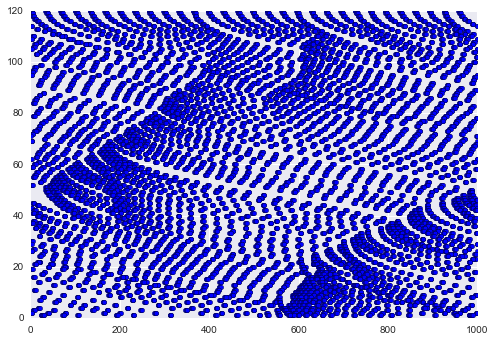

In [4]:
tron.plot_traffic(tron.get_location(33, 120))

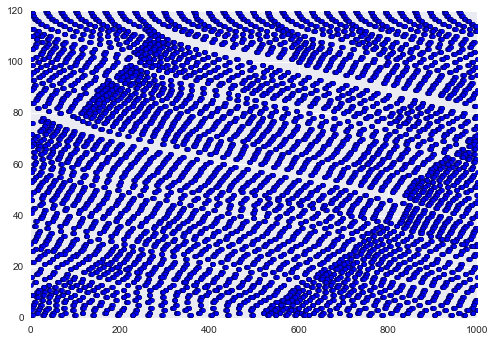

In [5]:
tron.plot_traffic(tron.get_location(30, 120))

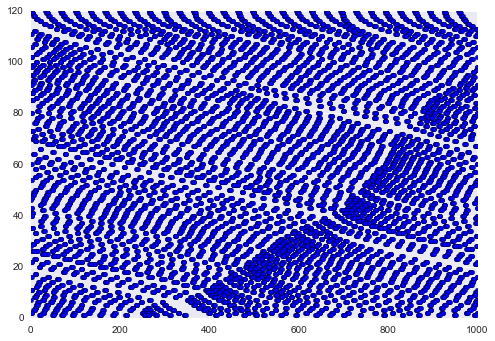

In [6]:
tron.plot_traffic(tron.get_location(27, 120))

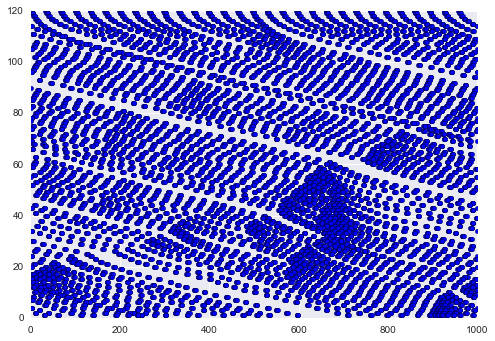

In [7]:
tron.plot_traffic(tron.get_location(25, 120))

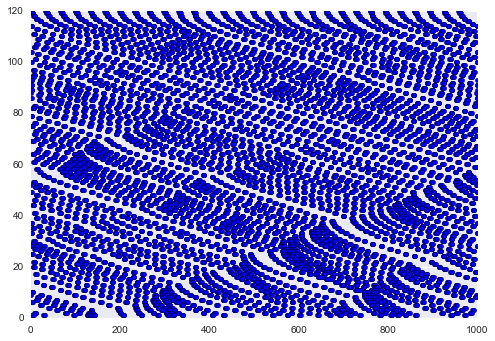

In [8]:
tron.plot_traffic(tron.get_location(20, 120))

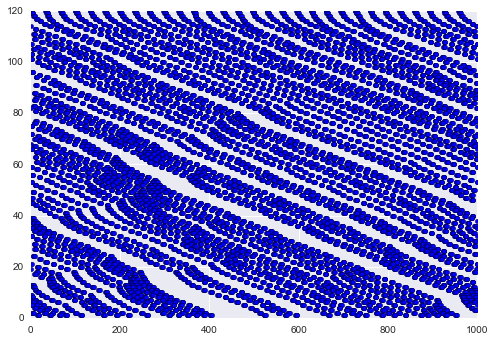

In [9]:
tron.plot_traffic(tron.get_location(15, 120))

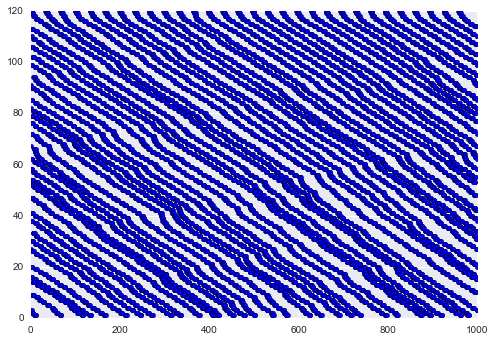

In [10]:
tron.plot_traffic(tron.get_location(10, 120))

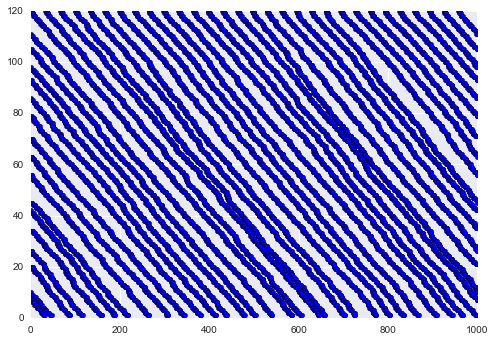

In [11]:
tron.plot_traffic(tron.get_location(5, 120))

In [12]:
tronss = Simulation(range(20,33), 60, 100)

In [13]:
speeds_list, average_speeds_list = tronss.full_monte()

In [14]:
print(average_speeds_list)

[[15.04, 16.3, 15.32, 16.55, 16.26, 16.35, 16.04, 14.62, 16.45, 15.83, 16.54, 15.96, 16.49, 16.03, 16.28, 16.05, 14.43, 15.0, 15.71, 15.4, 15.78, 16.29, 15.48, 16.58, 16.65, 16.39, 16.13, 15.79, 15.58, 16.3, 15.3, 15.98, 16.44, 15.74, 15.61, 16.46, 16.21, 15.79, 16.02, 16.15, 15.58, 16.43, 15.29, 16.02, 15.51, 16.01, 15.72, 14.95, 16.22, 16.49, 16.58, 16.38, 16.27, 16.39, 16.43, 16.57, 16.26, 16.0, 15.71, 16.03, 15.79, 16.03, 16.29, 16.28, 16.24, 16.17, 16.37, 16.0, 16.16, 16.02, 16.02, 15.96, 16.01, 16.74, 16.25, 15.61, 15.5, 16.13, 16.2, 16.23, 15.69, 16.28, 15.11, 16.09, 16.02, 16.08, 14.59, 15.65, 15.63, 15.76, 16.54, 16.22, 16.17, 16.35, 16.03, 15.61, 15.86, 15.65, 16.28, 15.89], [17.28, 17.31, 17.48, 18.03, 17.29, 16.7, 17.91, 17.48, 17.54, 17.74, 17.31, 15.99, 17.56, 17.24, 17.32, 17.92, 16.96, 18.16, 17.43, 16.78, 15.82, 17.29, 17.22, 16.35, 17.12, 17.49, 17.32, 17.34, 16.1, 17.43, 16.82, 18.22, 17.49, 17.58, 16.29, 17.96, 16.89, 17.89, 17.55, 17.11, 17.86, 17.58, 17.33, 17.55,

In [17]:
avg_speeds_by_max_speed = []
for i, speed in enumerate(average_speeds_list):
    avg_speed = i, st.mean(speed), st.stdev(speed)
    print(speed)
    print(avg_speed)
    avg_speeds_by_max_speed.append(avg_speed)
    
    

[15.04, 16.3, 15.32, 16.55, 16.26, 16.35, 16.04, 14.62, 16.45, 15.83, 16.54, 15.96, 16.49, 16.03, 16.28, 16.05, 14.43, 15.0, 15.71, 15.4, 15.78, 16.29, 15.48, 16.58, 16.65, 16.39, 16.13, 15.79, 15.58, 16.3, 15.3, 15.98, 16.44, 15.74, 15.61, 16.46, 16.21, 15.79, 16.02, 16.15, 15.58, 16.43, 15.29, 16.02, 15.51, 16.01, 15.72, 14.95, 16.22, 16.49, 16.58, 16.38, 16.27, 16.39, 16.43, 16.57, 16.26, 16.0, 15.71, 16.03, 15.79, 16.03, 16.29, 16.28, 16.24, 16.17, 16.37, 16.0, 16.16, 16.02, 16.02, 15.96, 16.01, 16.74, 16.25, 15.61, 15.5, 16.13, 16.2, 16.23, 15.69, 16.28, 15.11, 16.09, 16.02, 16.08, 14.59, 15.65, 15.63, 15.76, 16.54, 16.22, 16.17, 16.35, 16.03, 15.61, 15.86, 15.65, 16.28, 15.89]
(0, 15.976600000000001, 0.4619812843294705)
[17.28, 17.31, 17.48, 18.03, 17.29, 16.7, 17.91, 17.48, 17.54, 17.74, 17.31, 15.99, 17.56, 17.24, 17.32, 17.92, 16.96, 18.16, 17.43, 16.78, 15.82, 17.29, 17.22, 16.35, 17.12, 17.49, 17.32, 17.34, 16.1, 17.43, 16.82, 18.22, 17.49, 17.58, 16.29, 17.96, 16.89, 17.89,

In [16]:
print(avg_speeds_by_max_speed)

[(0, 15.976600000000001), (1, 17.145599999999998), (2, 17.2641), (3, 18.506500000000003), (4, 18.4428), (5, 19.653599999999997), (6, 19.691000000000003), (7, 20.421400000000002), (8, 20.3687), (9, 21.1853), (10, 21.1063), (11, 21.3085), (12, 21.5046)]
